### IMPORT

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import uuid
from datetime import datetime
import chrono
import os

In [97]:
#!pip install chrono

### LOAD DATA

In [98]:
#Load Data
url = "https://raw.githubusercontent.com/mdapoy/Machine_Learning_S6/refs/heads/main/week4/compas-scores-two-years.csv"
data = pd.read_csv(url)

In [99]:
#INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [100]:
data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [101]:
data.describe(include='object')

,name,first,last,compas_screening_date,sex,dob,age_cat,race,c_jail_in,c_jail_out,...,vr_offense_date,vr_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,in_custody,out_custody
count,7214,7214,7214,7214,7214,7214,7214,7214,6907,6907,...,819,819,7214,7214,7214,7214,7214,7214,6978,6978
unique,7158,2800,3950,690,2,5452,3,6,6907,6880,...,570,83,1,3,690,1,3,690,1156,1169
top,anthony smith,michael,williams,2013-03-20,Male,1994-07-15,25 - 45,African-American,2014-06-28 12:16:41,2013-09-14 05:58:00,...,2015-08-15,Battery,Risk of Recidivism,Low,2013-03-20,Risk of Violence,Low,2013-03-20,2013-02-22,2020-01-01
freq,3,149,83,32,5819,5,4109,3696,1,3,...,6,329,7214,3897,32,7214,4761,32,20,61


In [102]:
print(data.isnull().sum())

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [103]:
# Fungsi untuk parsing tanggal dengan chrono
def parse_date(date):
    if pd.isna(date) or date == '':
        return np.nan
    parsed = chrono.parseDate(str(date))
    return parsed if parsed else np.nan

### CLEANING DATA

In [104]:
# 1. Pembersihan Data

# Memilih fitur yang relevan
features = ['age', 'sex', 'race', 'priors_count', 'c_charge_degree', 'juv_fel_count',
            'juv_misd_count', 'juv_other_count', 'decile_score', 'two_year_recid']

# Filter data untuk memastikan hanya kolom yang relevan yang digunakan
data = data[features]

# Menangani nilai yang hilang tanpa menghapus baris
# Mengisi nilai numerik yang hilang dengan median
numeric_cols = ['age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'decile_score']
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Mengisi nilai kategorikal yang hilang dengan modus
categorical_cols = ['sex', 'race', 'c_charge_degree']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encoding variabel kategorikal
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['c_charge_degree'] = data['c_charge_degree'].map({'F': 1, 'M': 0})

# One-hot encoding untuk race
race_dummies = pd.get_dummies(data['race'], prefix='race')
data = pd.concat([data, race_dummies], axis=1)
data = data.drop('race', axis=1)

### VISUALISASI DATA

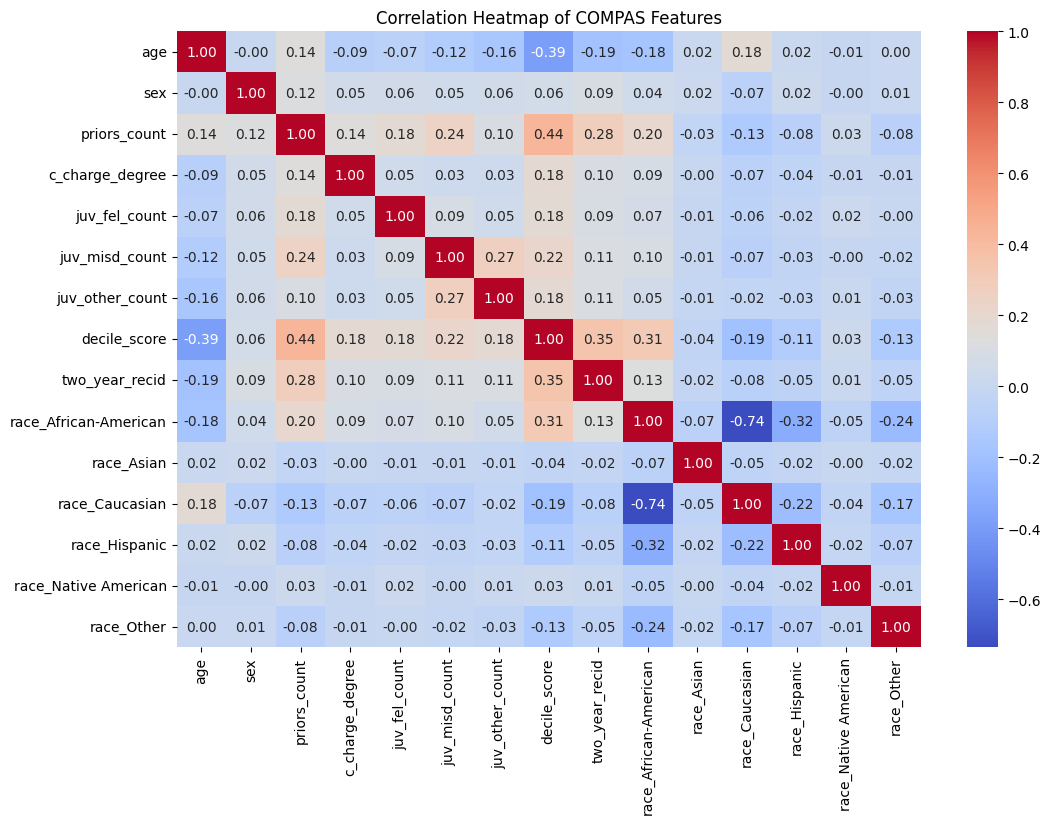

In [105]:
# 2. Visualisasi Korelasi Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of COMPAS Features')
plt.savefig('correlation_heatmap.png')
plt.show()

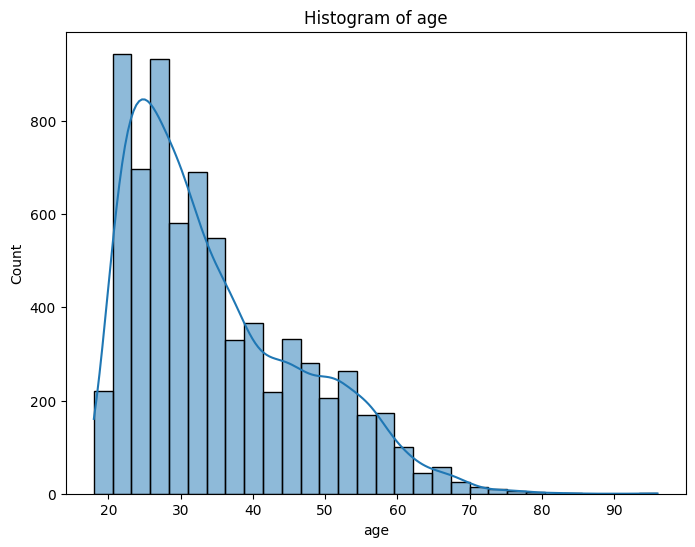

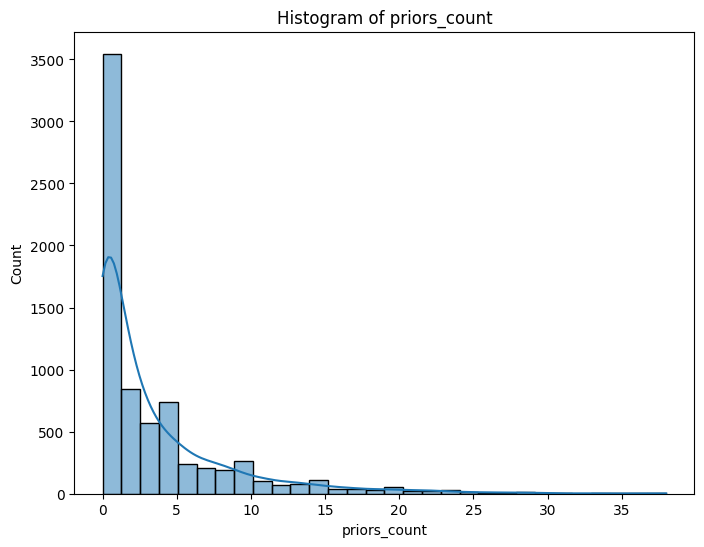

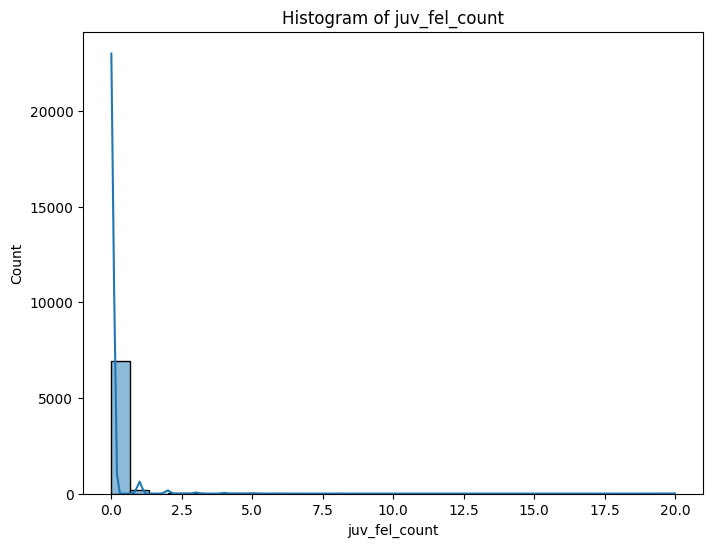

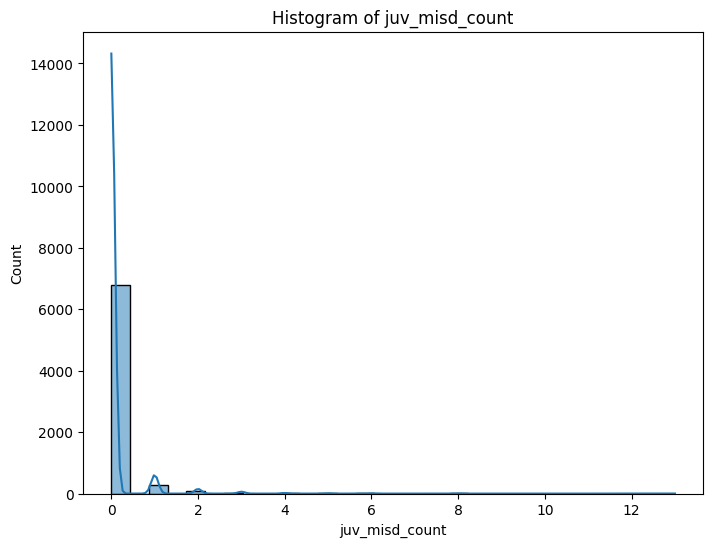

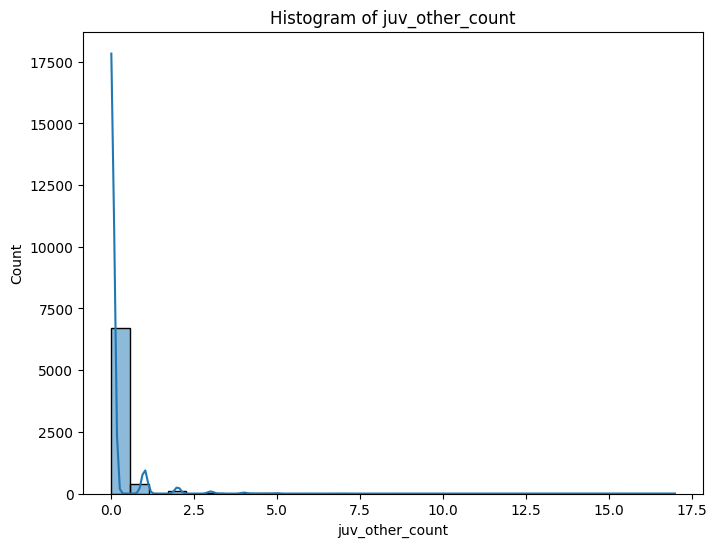

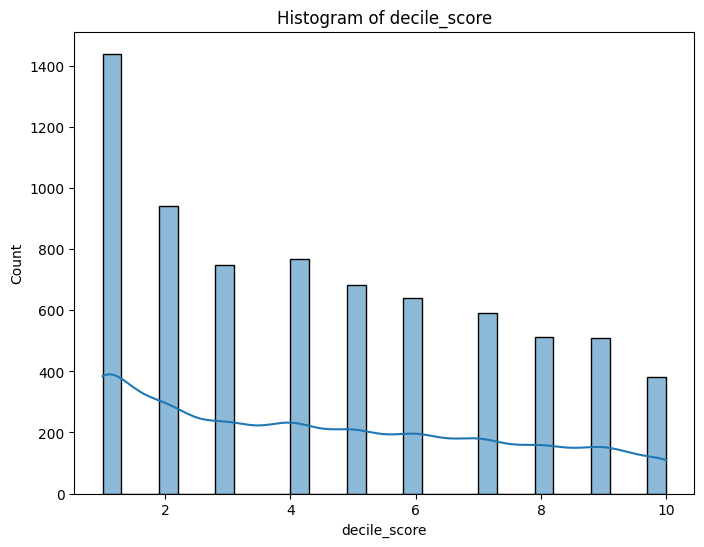

In [112]:
# 2. Visualisasi Histogram untuk Setiap Fitur
# Membuat direktori untuk menyimpan histogram
if not os.path.exists('histograms'):
    os.makedirs('histograms')

# Histogram untuk fitur numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'histograms/histogram_{col}.png')
    plt.show()

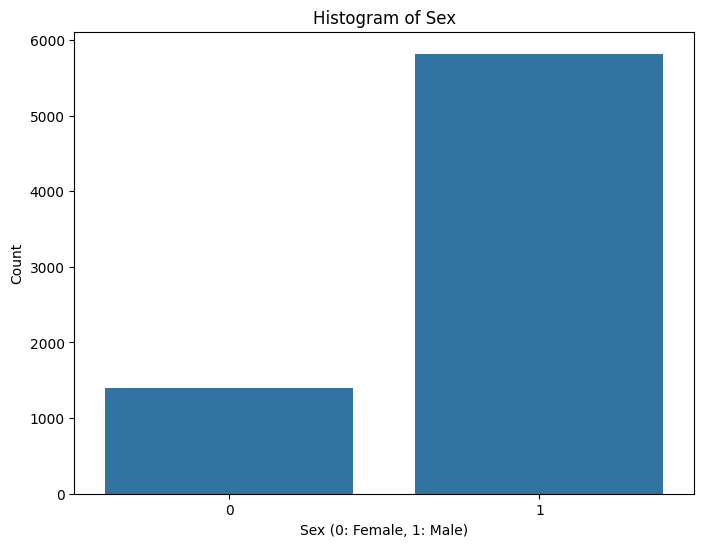

In [113]:
# Histogram untuk fitur kategorikal
# Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Histogram of Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.savefig('histograms/histogram_sex.png')
plt.show()

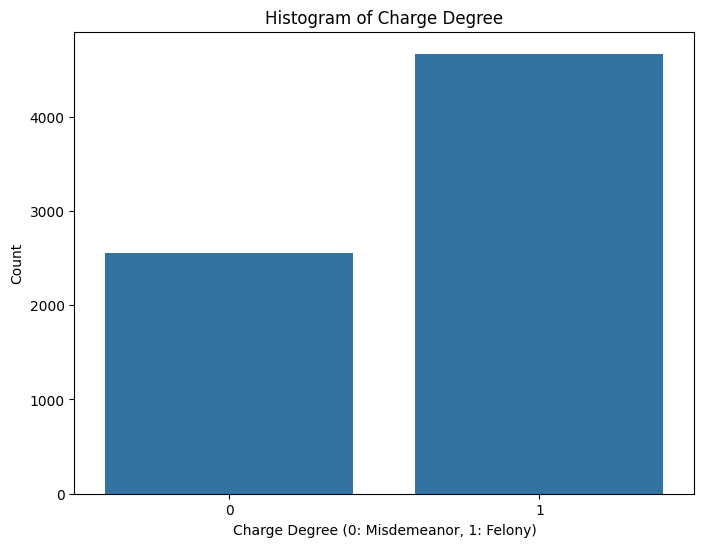

In [116]:
# c_charge_degree
plt.figure(figsize=(8, 6))
sns.countplot(x='c_charge_degree', data=data)
plt.title('Histogram of Charge Degree')
plt.xlabel('Charge Degree (0: Misdemeanor, 1: Felony)')
plt.ylabel('Count')
plt.savefig('histograms/histogram_c_charge_degree.png')
plt.show()

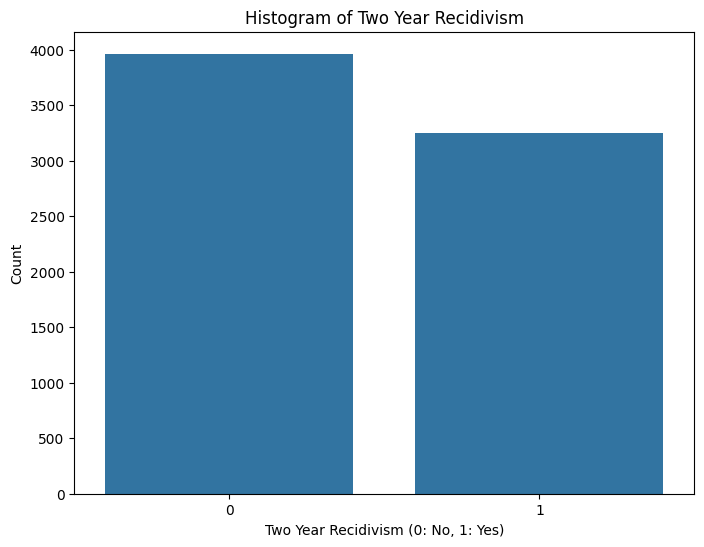

In [117]:
# Histogram untuk target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='two_year_recid', data=data)
plt.title('Histogram of Two Year Recidivism')
plt.xlabel('Two Year Recidivism (0: No, 1: Yes)')
plt.ylabel('Count')
plt.savefig('histograms/histogram_two_year_recid.png')
plt.show()

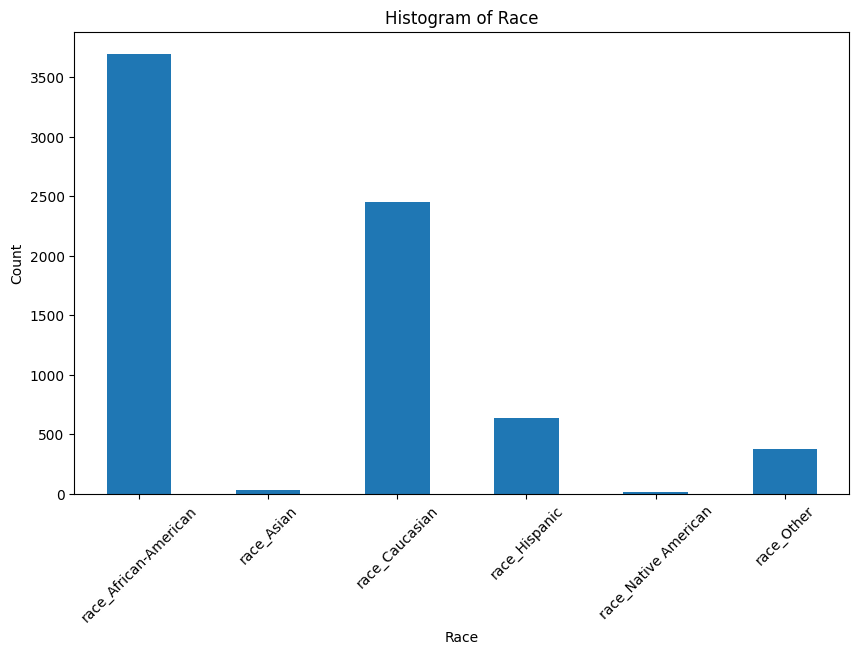

In [115]:
# Race (setelah one-hot encoding)
race_cols = [col for col in data.columns if col.startswith('race_')]
race_counts = data[race_cols].sum()
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Histogram of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('histograms/histogram_race.png')
plt.show()

### PREPARING DATA

In [106]:
# 3. Persiapan Data untuk Model
X = data.drop('two_year_recid', axis=1)
y = data['two_year_recid']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### TRAINING MODEL

In [107]:
# 4. Pelatihan Model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

### EVALUASI MODEL

In [108]:
# 5. Evaluasi Model
# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Matriks konfusi
cm = confusion_matrix(y_test, y_pred)

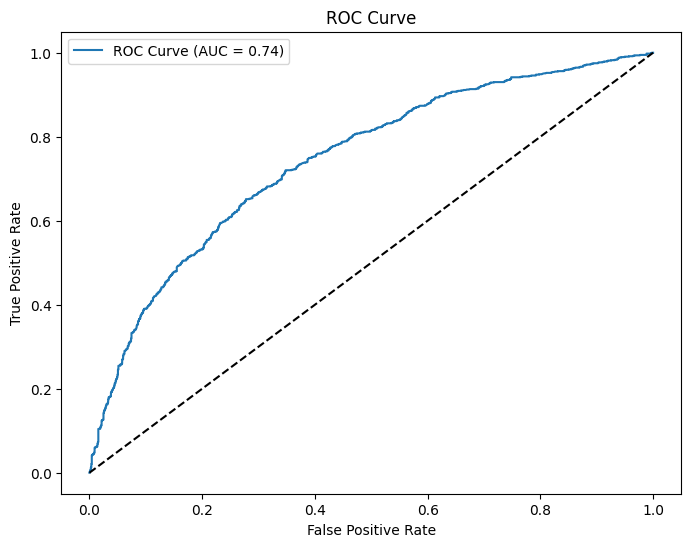

Evaluation Metrics:
Accuracy: 0.6864
Precision: 0.6687
Recall: 0.5772
F1 Score: 0.6196
AUC: 0.7440

Confusion Matrix:
[[933 274]
 [405 553]]


In [109]:
# Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_curve.png')
plt.show()

# Menampilkan hasil evaluasi
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:")
print(cm)

### PENJELASAN MATEMATIKA

- Akurasi:
  - Definisi: Definisi: Akurasi adalah rasio antara jumlah prediksi yang benar (baik untuk kelas positif maupun negatif) dengan total jumlah prediksi.
  - Rumus:
  - 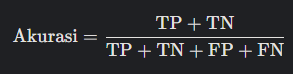
    - TP (True Positive): Jumlah kasus yang benar-benar COVID19 dan diprediksi COVID19.
    - TN (True Negative): Jumlah kasus yang benar-benar H1N1 dan diprediksi H1N1.
    - FP (False Positive): Jumlah kasus yang sebenarnya H1N1 tetapi diprediksi COVID19.
    - FN (False Negative): Jumlah kasus yang sebenarnya COVID19 tetapi diprediksi H1N1.
- Presisi
  - Definisi: Presisi mengukur seberapa banyak prediksi positif yang benar-benar benar, yaitu rasio antara prediksi positif yang benar dengan total prediksi positif.
  - Remus:
  - 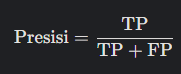
- Recall
  - Definisi: Recall mengukur seberapa banyak kasus positif yang berhasil dikenali oleh model, yaitu rasio antara prediksi positif yang benar dengan total kasus positif yang sebenarnya.
  - Rumus:
  - 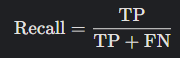
- F1-Score
  - Definisi: F1-Score adalah rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara kedua metrik ini. F1-Score lebih representatif daripada akurasi untuk data yang tidak seimbang.
  - Rumus.
  - 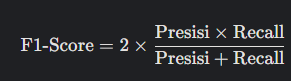
- AUC (Area Under the Curve)
  - Definisi: AUC adalah luas di bawah kurva ROC (Receiver Operating Characteristic). AUC mengukur kemampuan model untuk membedakan antara kelas positif (COVID19) dan negatif (H1N1), dengan nilai berkisar antara 0 hingga 1.
    - AUC = 1: Pemisahan sempurna antara kelas.
    - AUC = 0,5: Model tidak lebih baik dari tebakan acak.
  - Rumus:
  - 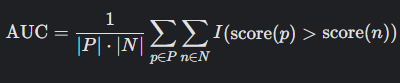
- ROC (Receiver Operating Characteristic Curve)
  - Definisi: Kurva ROC adalah grafik yang menunjukkan hubungan antara True Positive Rate (TPR) (yaitu Recall) pada sumbu y dan False Positive Rate (FPR) pada sumbu x, untuk berbagai ambang batas probabilitas prediksi.
  - Rumus:
    - Untuk setiap ambang batas probabilitas 𝑡 (misalnya, model memprediksi COVID19 jika probabilitas > 𝑡):
    - 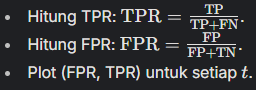
    - Garis diagonal (dari (0,0) ke (1,1)) menunjukkan performa acak (AUC = 0,5).